In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.ndimage
import cv2
import scipy.misc

C:\Users\Simon\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  app.launch_new_instance()
C:\Users\Simon\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


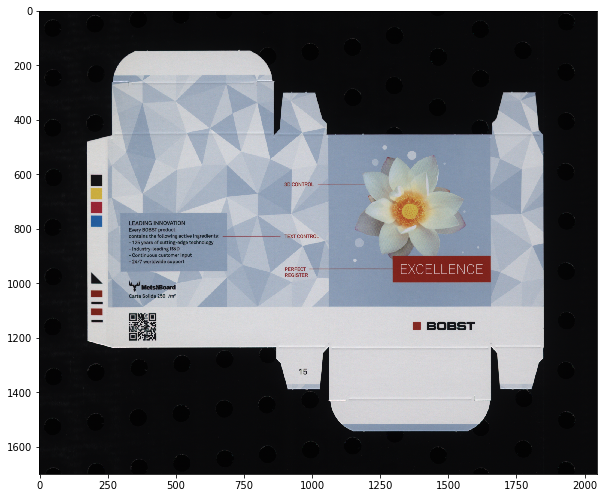

In [2]:
#Load mean image
root_folder = '../Images/'
mean_image = scipy.ndimage.imread('full_mean.jpg')
selected_image = 'ID4491.tif'
image = scipy.ndimage.imread(root_folder+selected_image)
plt.figure(figsize=[10,10])
plt.imshow(image)
plt.show()

In [3]:
def ECC(im1,im2,iterations=30):
    # Convert images to grayscale
    im1_gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
    im2_gray = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)

    # Find size of image1
    sz = im1.shape

    # Define the motion model
    warp_mode = cv2.MOTION_EUCLIDEAN

    # Define 2x3 or 3x3 matrices and initialize the matrix to identity
    if warp_mode == cv2.MOTION_HOMOGRAPHY :
        warp_matrix = np.eye(3, 3, dtype=np.float32)
    else :
        warp_matrix = np.eye(2, 3, dtype=np.float32)

    # Specify the number of iterations.
    number_of_iterations = iterations;

    # Specify the threshold of the increment
    # in the correlation coefficient between two iterations
    termination_eps = 1e-10;

    # Define termination criteria
    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)

    # Run the ECC algorithm. The results are stored in warp_matrix.
    (cc, warp_matrix) = cv2.findTransformECC (im1_gray,im2_gray,warp_matrix, warp_mode, criteria)

    if warp_mode == cv2.MOTION_HOMOGRAPHY :
        # Use warpPerspective for Homography 
        im2_aligned = cv2.warpPerspective (im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
    else :
        # Use warpAffine for Translation, Euclidean and Affine
        im2_aligned = cv2.warpAffine(im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);

    return im2_aligned



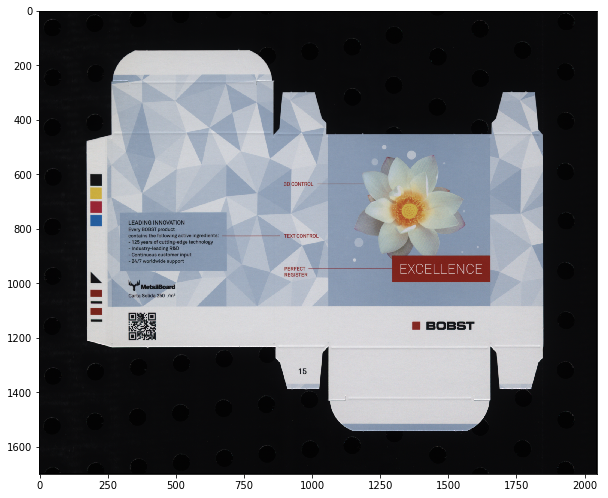

In [4]:
image_aligned = ECC(mean_image,image)
plt.figure(figsize=[10,10])
plt.imshow(image_aligned)
plt.show()

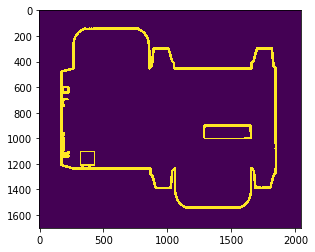

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [47]:
def get_contours(mean_image):
    im = mean_image.copy()
    blurred = cv2.pyrMeanShiftFiltering(im,31,91)
    imgray = cv2.cvtColor(blurred,cv2.COLOR_BGR2GRAY)
    ret, threshold = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    _,contours,_ =cv2.findContours(threshold,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

    img=im.copy()
    img[:,:,:]=0
    c = cv2.drawContours(img,contours,-1,(255,255,255),20)
    c[900:1100,200:700]=0
    c[700:1000,200:500]=0
    c[920:1000,1300:1600]=0 
    c[1110:1200,330:430]=0 #QR
    c[1110:1200,1330:1630]=0 #BOBST
    c = cv2.cvtColor(c,cv2.COLOR_BGR2GRAY)
    plt.imshow(c)
    plt.show()
    return c

get_contours(mean_image)
